Количество отрезков разбиения: 8
0.20170285543092292 Метод прямоугольников
0.20196925477554303 Метод трапеций
0.20179165521246295 Метод Симпсона
0.2017910095418658 Аналитическое значение


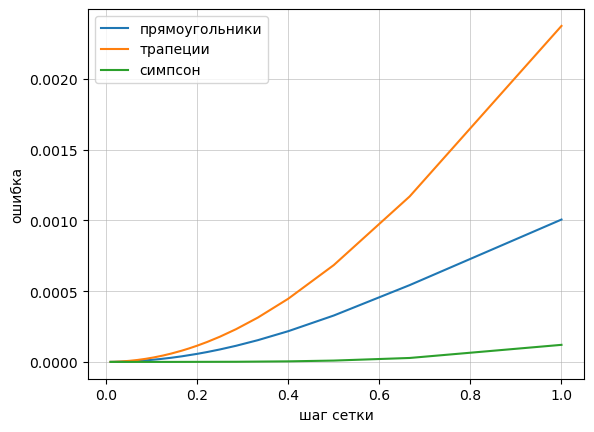

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math


a = -1
b = 1
n = int(input("Количество отрезков разбиения: "))
f = lambda x: 1/(x**3+x+10)



def rectangle(n):
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    ksi = np.array([(x[i] + h/2) for i in range(n)])
    f_ksi = f(ksi)
    integral = 0
    for i in range(n):
        integral += (f_ksi[i]*(x[i+1] - x[i]))
    return integral

def trapezoid(n):
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    f_x = f(x)
    integral = 0
    for i in range(1,n):
        integral += (f_x[i])
    integral = integral*2
    integral += (f_x[0] + f_x[n])
    return integral*(h/2)


def simpson(n):
    h_s = (b-a)/(2*n)
    x_s = np.array([a + i*h_s for i in range(2*n+1)])
    f_s = f(x_s)
    integral_nech = 0
    for i in range(1,n+1):
        integral_nech += 4*f_s[2*i-1]
    integral_chet = 0
    for i in range(1,n):
        integral_chet += 2*f_s[2*i]
    integral = integral_chet + integral_nech + (f_s[0] + f_s[len(f_s) - 1])
    return integral*(h_s/3)
t = sp.Symbol('t')
integr_real = 0.2017910095418658


print(rectangle(n), "Метод прямоугольников")
print(trapezoid(n), "Метод трапеций")
print(simpson(n), "Метод Симпсона")
print(integr_real, "Аналитическое значение")

#r_x = [k for k in range(5,100)]
r_x = np.arange(2,200)
rec_val = np.array([rectangle(k) for k in r_x])
trap_val = np.array([trapezoid(k) for k in r_x])
simp_val = np.array([simpson(k) for k in r_x])


r_rec = abs(rec_val - integr_real)
r_trap = abs(trap_val - integr_real)
r_simp = abs(simp_val - integr_real)



plt.plot([(b-a)/k for k in range(2,200)], r_rec, label = 'прямоугольники')
plt.plot([(b-a)/k for k in range(2,200)], r_trap, label = 'трапеции')
plt.plot([(b-a)/k for k in range(2,200)], r_simp, label = 'симпсон')
plt.legend()
plt.grid(True)
plt.grid(linewidth = 0.4)
plt.xlabel('шаг сетки')
plt.ylabel('ошибка')
plt.show()

